<a href="https://colab.research.google.com/github/Indukurivigneshvarma/Deep_Learning/blob/main/Computer_Vision/YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!nvidia-smi
!pip install -q torch torchvision
!pip install -q -U opencv-python-headless matplotlib
from IPython.display import clear_output
clear_output(wait=True)

Tue Oct 28 10:18:42 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [7]:
!pip install -q ultralytics
!pip install -q -U opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.5 MB/s eta 0:00:00


In [30]:
from ultralytics import YOLO
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

model = YOLO("yolov5s.pt")
if torch.cuda.is_available():
    model.to("cuda")

print("✅ ultralytics YOLO model ready.")

from IPython.display import clear_output
clear_output(wait=False)

✅ Inference complete — displaying annotated image


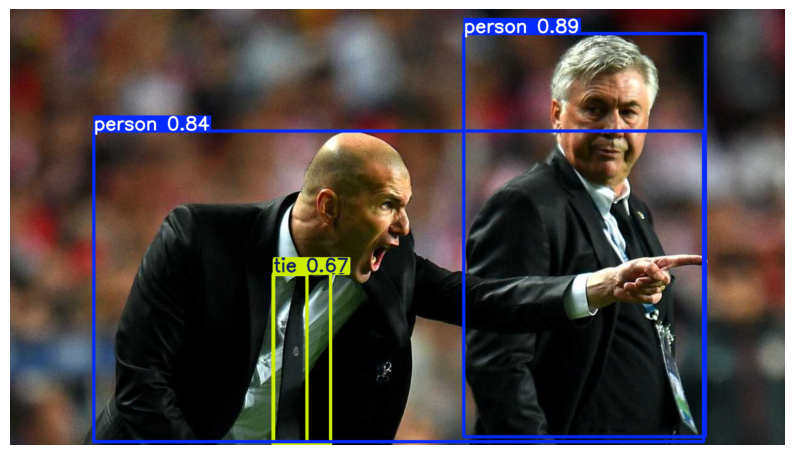

In [31]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import cv2
import numpy as np
from IPython.display import clear_output

img_url = "https://ultralytics.com/images/zidane.jpg"
resp = requests.get(img_url)
img = Image.open(BytesIO(resp.content)).convert("RGB")

results = model(img, imgsz=640)
annotated = results[0].plot()
clear_output(wait=True)
print("✅ Inference complete — displaying annotated image")

plt.figure(figsize=(10,6))
plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [32]:
out_path = "yolov5_result.jpg"
cv2.imwrite(out_path, annotated)
print("Saved:", out_path)

Saved: yolov5_result.jpg


In [33]:
import glob, cv2

image_files = glob.glob("/content/*.jpg")

if not image_files:
    print("⚠️ No images found. Please upload some .jpg files to /content/")
else:
    for p in image_files:
        results = model(p, imgsz=640)
        annotated = results[0].plot()
        out_path = "/content/annot_" + p.split("/")[-1]
        cv2.imwrite(out_path, annotated)
        print("✅ Processed:", p, "->", out_path)



image 1/1 /content/virat.jpg: 480x640 8 persons, 1 tie, 12.7ms
Speed: 2.3ms preprocess, 12.7ms inference, 5.3ms postprocess per image at shape (1, 3, 480, 640)
✅ Processed: /content/virat.jpg -> /content/annot_virat.jpg


In [34]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

from IPython.display import clear_output
clear_output(wait=False)

In [35]:
!python detect.py --weights yolov5s.pt --source /content/traffic.mp4 --conf 0.25 --save-txt --project /content --name yolov5_video_out

from IPython.display import clear_output
clear_output(wait=False)
